# Project Name: Drinking Water Potability Prediction using ML and H2O Auto ML 

## Context :
### Access to safe drinking water is essential to health, a basic human right, and a component of effective health protection policy. Lack of potable water creates serious health and development challenges at national, regional, and local levels. In many regions, investments in water supply and sanitation have shown net economic benefits, as reductions in health issues and medical costs often outweigh infrastructure expenses. 
### The `drinkingwaterpotability.csv` file contains water quality metrics for 3,276 different water bodies. 
### In this project, we use multiple ML models along with the H2O Auto ML library to predict whether water is potable based on its chemical attributes. 
### To evaluate model performance, we not only rely on metrics like ROC AUC but also visualize the **ROC curve** (measuring discrimination against random guessing) and the **Precision–Recall curve** (highlighting the trade-off between precision and recall in imbalanced data). These help provide a more realistic assessment of model applicability for water safety prediction. 

## Time Line of the Project:
- Importing Libraries and DataSet
- Data Analysis and Preprocessing
- Feature Engineering
- Model Building using ML
- Model Building and Prediction using H2O Auto ML
- Plot ROC and PR curves for Random Forest

## Importing Libraries

In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## Loading the Data Set

In [38]:
df= pd.read_csv("drinking_water_potability.csv")

In [39]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [40]:
df.shape

(3276, 10)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [42]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

## Data Analysis

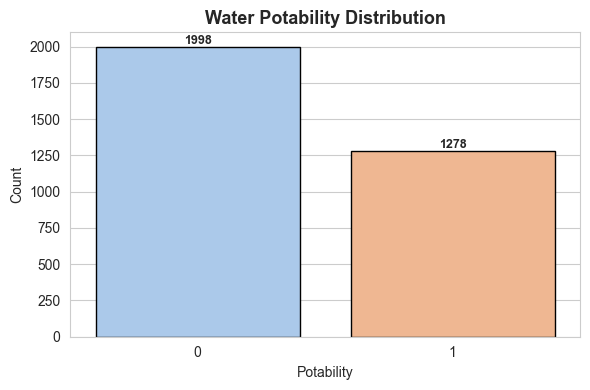

Potability
0    1998
1    1278
Name: count, dtype: int64

In [43]:
plt.figure(figsize=(6,4))

# countplot for potability
sns.countplot(x="Potability", hue="Potability", data=df,
              palette="pastel", edgecolor="black", legend=False)


# add counts on top of bars
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2,
             p.get_height(),
             int(p.get_height()),
             ha='center', va='bottom', fontsize=9, weight='bold')

plt.title("Water Potability Distribution", fontsize=13, weight='bold')
plt.xlabel("Potability")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

df["Potability"].value_counts()

In [44]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### Handling Null Values

In [45]:
null= ['ph','Sulfate','Trihalomethanes']

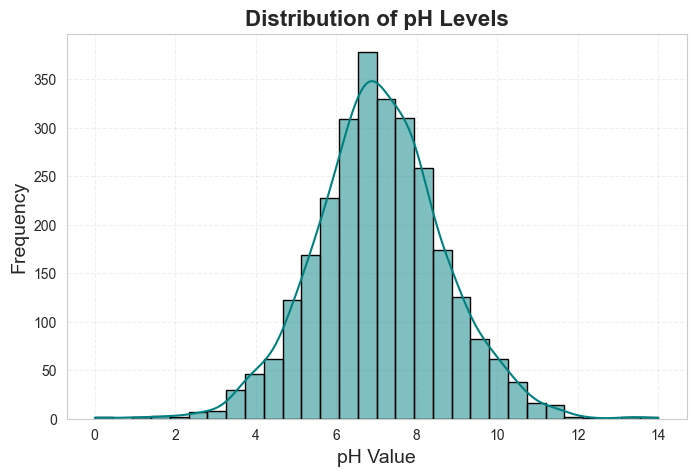

In [46]:
plt.figure(figsize=(8,5))
sns.histplot(df['ph'], bins=30, kde=True, color="teal", edgecolor="black")

plt.title("Distribution of pH Levels", fontsize=16, fontweight='bold')
plt.xlabel("pH Value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(alpha=0.3, linestyle="--")

plt.show()

In [47]:
df['ph'] = df['ph'].replace(np.nan, df.ph.mean())

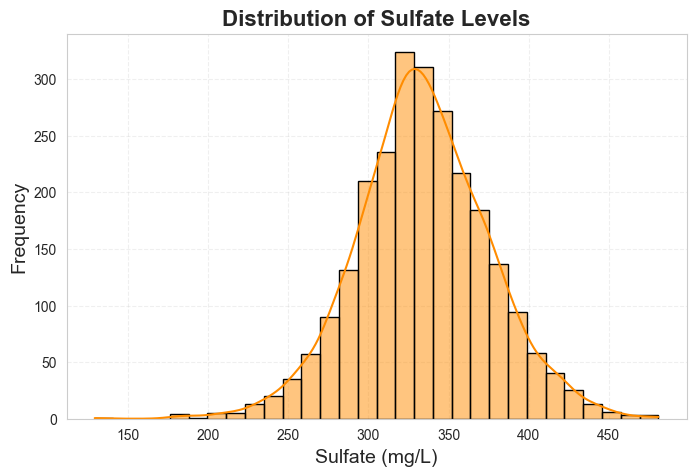

In [48]:
plt.figure(figsize=(8,5))
sns.histplot(df['Sulfate'], bins=30, kde=True, color="darkorange", edgecolor="black")

plt.title("Distribution of Sulfate Levels", fontsize=16, fontweight='bold')
plt.xlabel("Sulfate (mg/L)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(alpha=0.3, linestyle="--")

plt.show()

In [49]:
df['Sulfate'] = df['Sulfate'].replace(np.nan,df.Sulfate.mean())

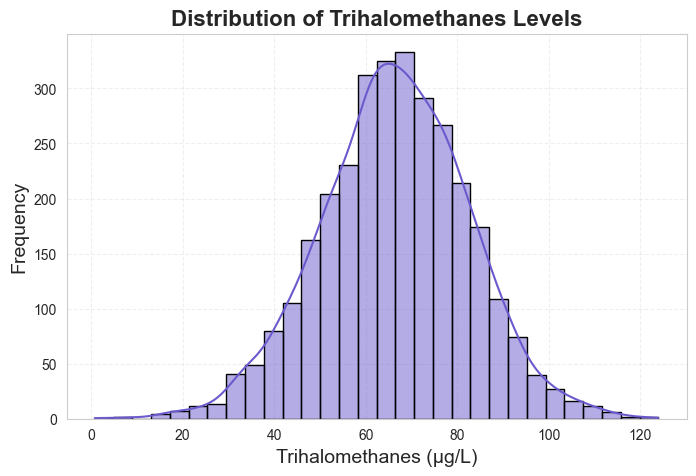

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(df['Trihalomethanes'], bins=30, kde=True, color="slateblue", edgecolor="black")

plt.title("Distribution of Trihalomethanes Levels", fontsize=16, fontweight='bold')
plt.xlabel("Trihalomethanes (µg/L)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(alpha=0.3, linestyle="--")

plt.show()

In [51]:
df['Trihalomethanes'] = df['Trihalomethanes'].replace(np.nan,df.Trihalomethanes.mean())

In [52]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

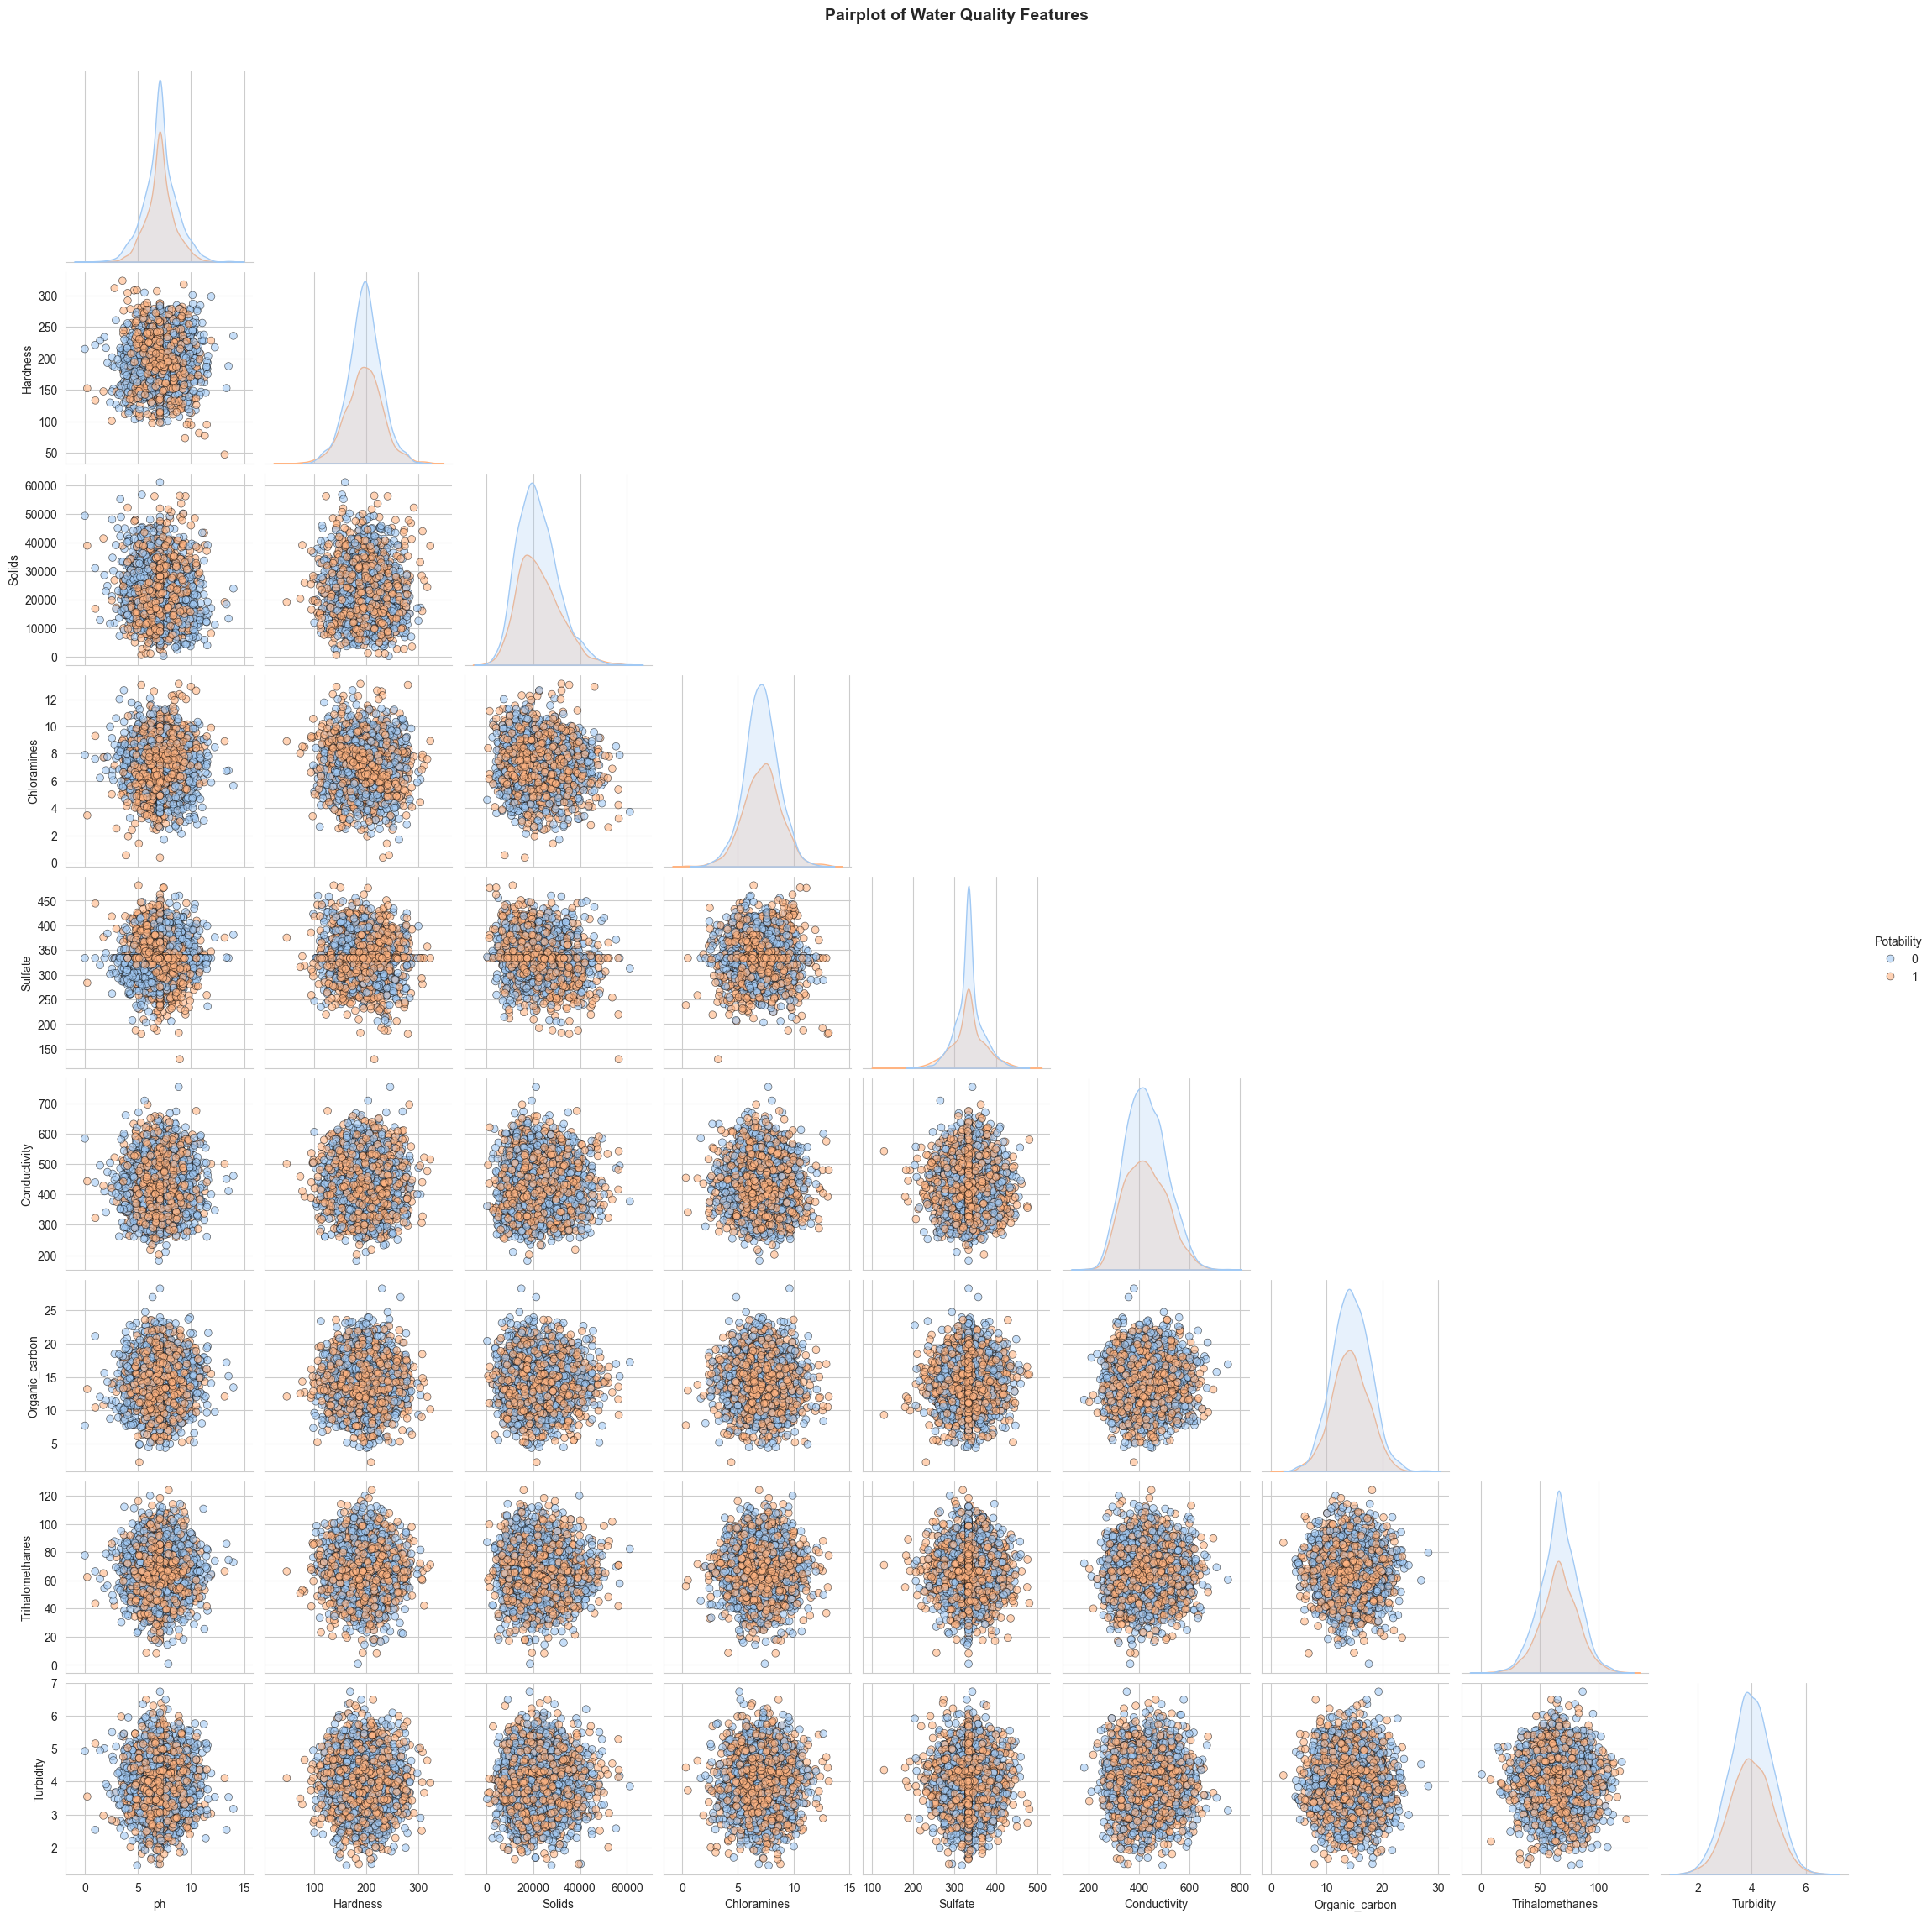

In [53]:
sns.set_style("whitegrid")

sns.pairplot(df, 
             hue="Potability", 
             palette="pastel", 
             diag_kind="kde", 
             corner=True,
             plot_kws={"alpha":0.6, "s":40, "edgecolor":"k"})  

plt.suptitle("Pairplot of Water Quality Features", 
             y=1.02, fontsize=14, weight="bold")
plt.show()

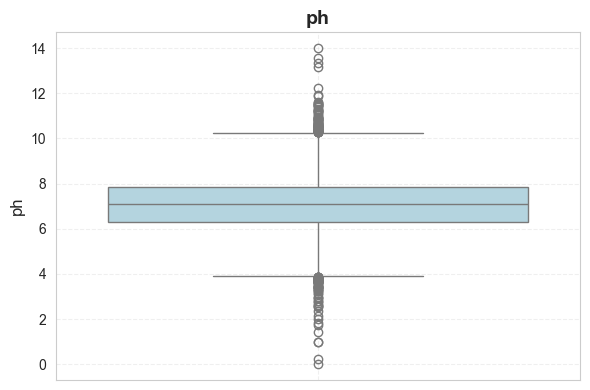

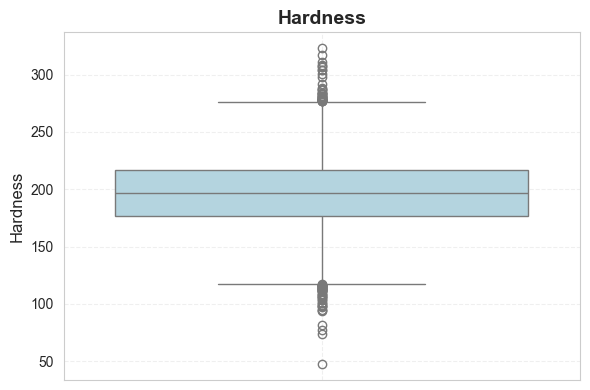

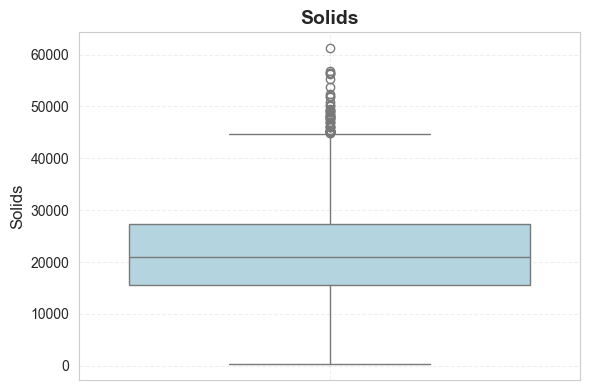

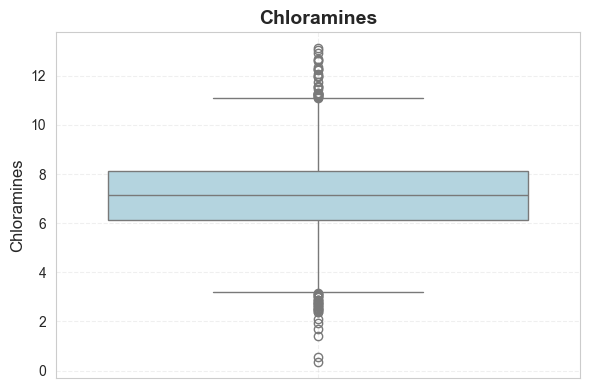

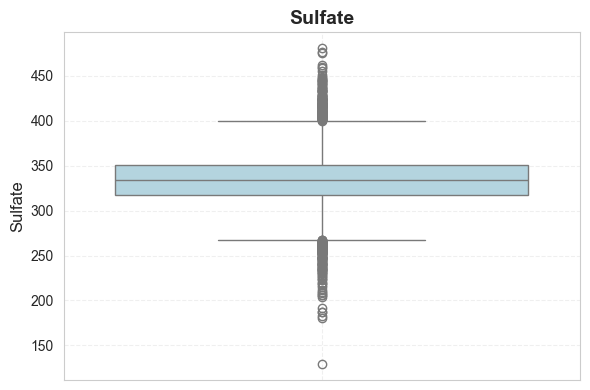

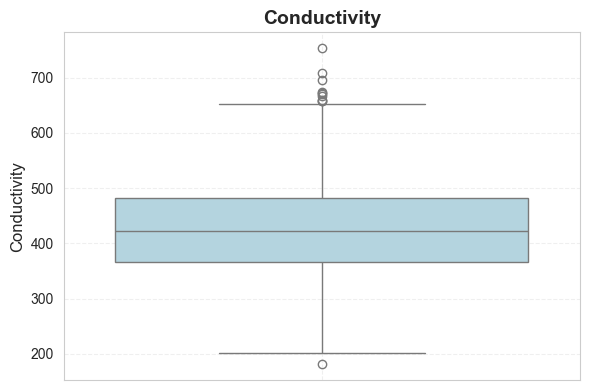

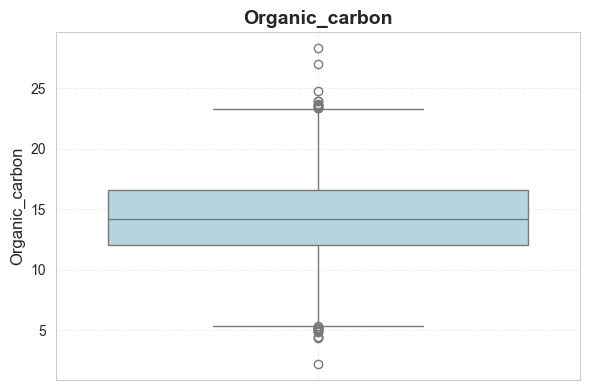

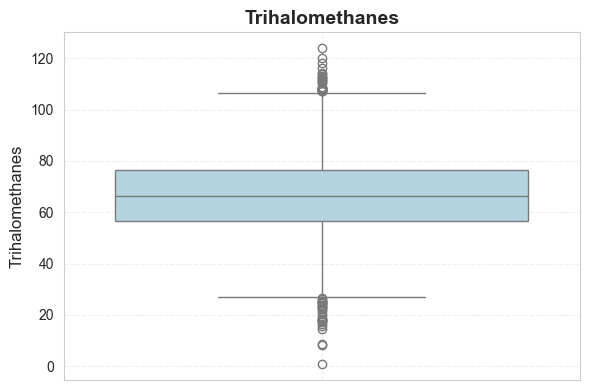

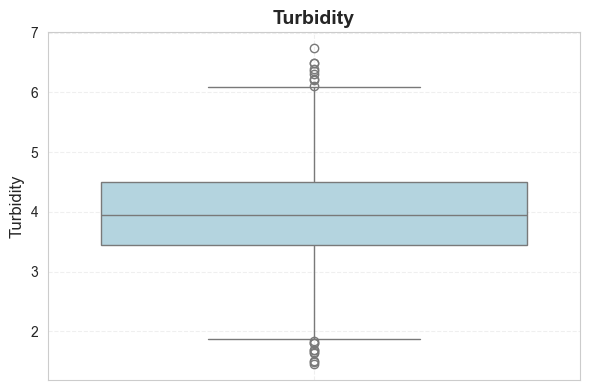

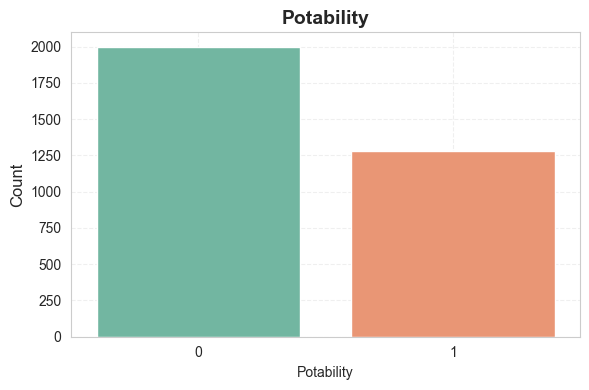

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

for column in df.columns:
    plt.figure(figsize=(6,4))
    
    if df[column].nunique() <= 10:
        sns.countplot(x=df[column], palette="Set2")
        plt.ylabel("Count", fontsize=12)
    else:  
        sns.boxplot(y=df[column], color="lightblue")
        plt.ylabel(column, fontsize=12)
    
    plt.title(f"{column}", fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3, linestyle="--")
    plt.tight_layout()
    plt.show()

In [55]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


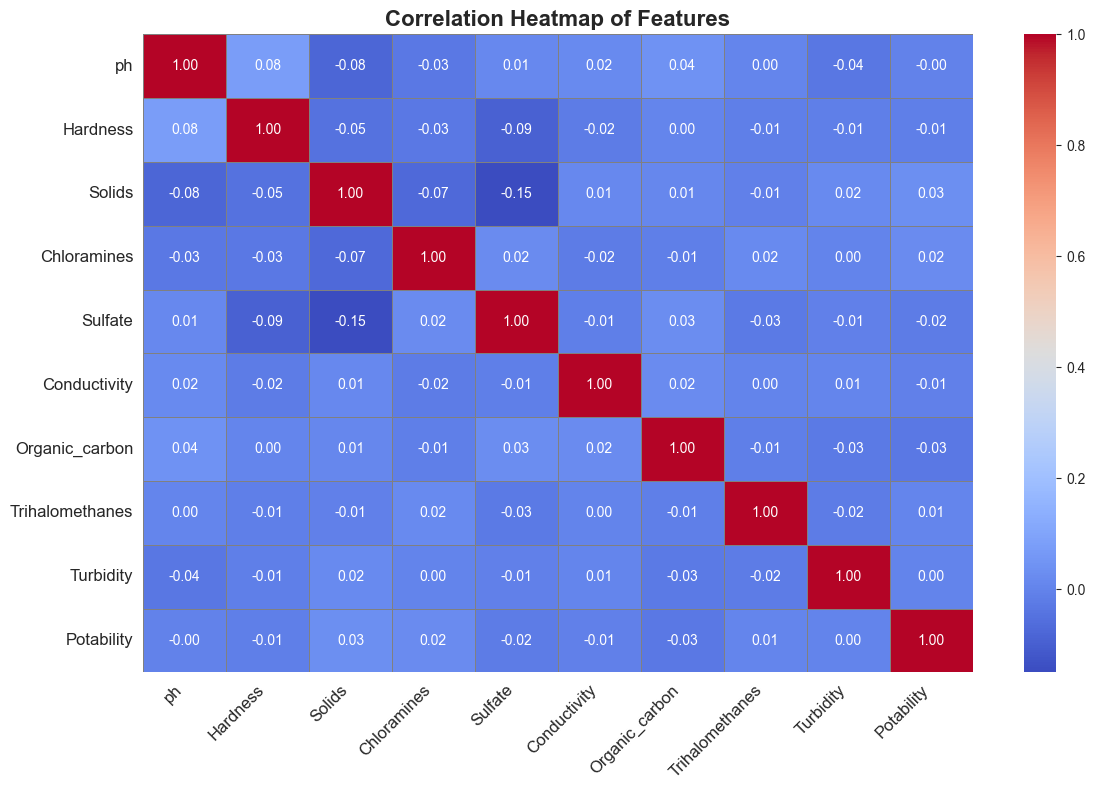

In [56]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5, linecolor='gray')

plt.title("Correlation Heatmap of Features", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Feature Engineering

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
x = df.drop(['Potability'],axis=1)
y =df.Potability

In [58]:
Ext = ExtraTreesClassifier()
Ext.fit(x,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [59]:
print(Ext.feature_importances_)

[0.12510542 0.11850333 0.11246509 0.11088113 0.12867235 0.10109376
 0.10147502 0.10266756 0.09913634]


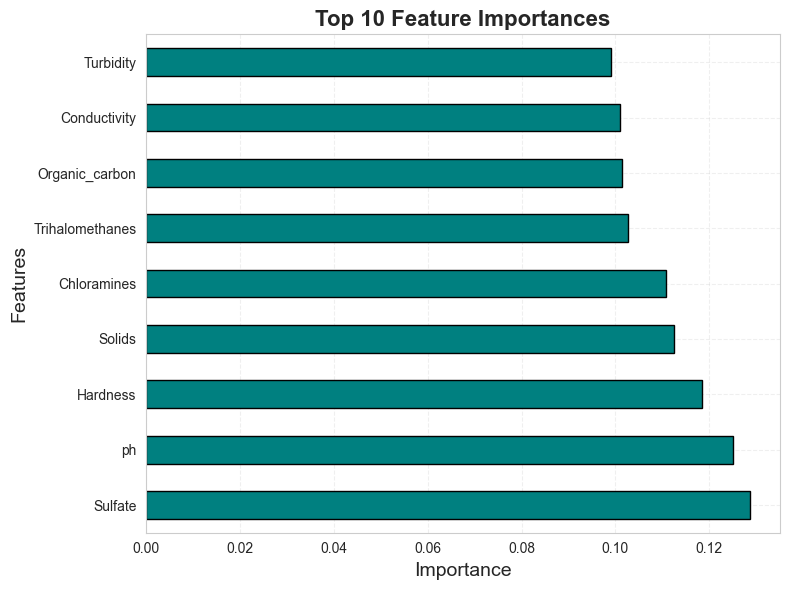

In [60]:
feature = pd.Series(Ext.feature_importances_, index=x.columns)

plt.figure(figsize=(8,6))
feature.sort_values(ascending=True).nlargest(10).plot(
    kind='barh', 
    color='teal', 
    edgecolor='black'
)

plt.title("Top 10 Feature Importances", fontsize=16, fontweight='bold')
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

In [61]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Let us Standardize our data

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scale= StandardScaler()

In [64]:
scaled= scale.fit_transform(x)

In [65]:
scaled_df = pd.DataFrame(scaled,columns= x.columns)
scaled_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.000000,0.259195,-0.139471,0.112415,0.961357,1.708954,-1.180651,1.306149,-1.286298
1,-2.289339,-2.036414,-0.385987,-0.307694,0.000000,2.062575,0.270597,-0.638480,0.684218
2,0.692868,0.847665,-0.240047,1.360594,0.000000,-0.094032,0.781117,0.001509,-1.167365
3,0.840950,0.547651,0.000493,0.592008,0.639519,-0.778830,1.255134,2.152874,0.848412
4,1.368569,-0.464429,-0.460249,-0.363698,-0.654177,-0.343939,-0.824357,-2.181599,0.138786


### Our data is ready for model building

In [66]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

## Model Development
### We will use the following models:
- Logistic Regression
- SVM
- Random Forest

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

## Logistic Regression

In [68]:
warnings.filterwarnings('ignore')
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_hat = lr.predict(X_train)
y_test_hat = lr.predict(X_test)


print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       610
           1       0.00      0.00      0.00       373

    accuracy                           0.62       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.39      0.62      0.48       983

Roc_auc score
-------------------------------------------------------
0.5

Confusion matrix
-------------------------------------------------------
[[610   0]
 [373   0]]

accuracy score
-------------------------------------------------------
test data accuracy score: 62.05493387589013
train data accuracy score: 60.57566506759704


## Support Vector Machines

In [69]:
warnings.filterwarnings('ignore')
svm = SVC()
svm.fit(X_train, y_train)
y_train_hat = svm.predict(X_train)
y_test_hat = svm.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print(accuracy_score(y_test, y_test_hat)*100)
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       610
           1       0.33      0.00      0.01       373

    accuracy                           0.62       983
   macro avg       0.48      0.50      0.39       983
weighted avg       0.51      0.62      0.48       983

Roc_auc score
-------------------------------------------------------
0.4997011383114315

Confusion matrix
-------------------------------------------------------
[[608   2]
 [372   1]]

accuracy score
-------------------------------------------------------
61.953204476093596
test data accuracy score: 61.953204476093596
train data accuracy score: 60.706498037505455


## Random Forest

In [70]:
rf = RandomForestClassifier(n_jobs=-1,random_state=123)
rf.fit(X_train, y_train)
y_train_hat = rf.predict(X_train)
y_test_hat = rf.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.90      0.78       610
           1       0.66      0.33      0.44       373

    accuracy                           0.68       983
   macro avg       0.68      0.61      0.61       983
weighted avg       0.68      0.68      0.65       983

Roc_auc score
-------------------------------------------------------
0.6140596844372171

Confusion matrix
-------------------------------------------------------
[[548  62]
 [250 123]]

accuracy score
-------------------------------------------------------
test data accuracy score: 68.26042726347914
train data accuracy score: 100.0


## Using Auto ML

### H2O Auto ML

#### H2O is a fully open-source, distributed in-memory machine learning platform with linear scalability. H2O supports the most widely used statistical & machine learning algorithms, including gradient boosted machines, generalized linear models, deep learning, and many more.

### Installing H2O Auto ML

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [ ]:
!pip install h2o

## Importing the h2o Python module and H2OAutoML class

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')  ##  the h2o.init() makes sure that no prior instance of H2O is running.

### Loading data

In [74]:
df = h2o.import_file("drinking_water_potability.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [75]:
df.head()

ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
nan,204.89,20791.3,7.30021,368.516,564.309,10.3798,86.991,2.96314,0
3.71608,129.423,18630.1,6.63525,nan,592.885,15.18,56.3291,4.50066,0
8.09912,224.236,19909.5,9.27588,nan,418.606,16.8686,66.4201,3.05593,0
8.31677,214.373,22018.4,8.05933,356.886,363.267,18.4365,100.342,4.62877,0
9.09222,181.102,17979,6.5466,310.136,398.411,11.5583,31.998,4.07508,0
5.58409,188.313,28748.7,7.54487,326.678,280.468,8.39973,54.9179,2.55971,0
10.2239,248.072,28749.7,7.51341,393.663,283.652,13.7897,84.6036,2.67299,0
8.63585,203.362,13672.1,4.56301,303.31,474.608,12.3638,62.7983,4.40142,0
nan,118.989,14285.6,7.80417,268.647,389.376,12.706,53.9288,3.59502,0
11.1803,227.231,25484.5,9.0772,404.042,563.885,17.9278,71.9766,4.37056,0


## H2O auto ml can do all the data preprocessing techniques

In [76]:
df_train,df_test= df.split_frame(ratios=[.8])

### Splitting the data

In [77]:
y = "Potability"  ## dependent variable
x = df.columns  ## Independent variable
x.remove(y)

### Defining the model

In [78]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity="info", nfolds=2)

### Fitting the model

In [ ]:
aml.train(x=x,y=y, training_frame=df_train)

AutoML progress: |
02:29:14.741: Project: AutoML_1_20250903_22914
02:29:14.742: Setting stopping tolerance adaptively based on the training frame: 0.019596545041740514
02:29:14.742: Build control seed: 10
02:29:14.742: training frame: Frame key: AutoML_1_20250903_22914_training_py_3_sid_bb9a    cols: 10    rows: 2604  chunks: 85    size: 236955  checksum: 627063819193626716
02:29:14.742: validation frame: NULL
02:29:14.742: leaderboard frame: NULL
02:29:14.742: blending frame: NULL
02:29:14.742: response column: Potability
02:29:14.742: fold column: null
02:29:14.742: weights column: null
02:29:14.747: AutoML: XGBoost is not available; skipping it.
02:29:14.749: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 1

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),1/1
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


### Seeing the Leaderboard

In [80]:
lb = aml.leaderboard

In [81]:
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_1_20250903_22914,0.46485,0.216085,0.433374,0.327085,0.216085
StackedEnsemble_AllModels_1_AutoML_1_20250903_22914,0.465948,0.217107,0.434409,0.328003,0.217107
XRT_2_AutoML_2_20250903_22925,0.469319,0.220261,0.435574,0.331218,0.220261
XRT_1_AutoML_1_20250903_22914,0.469319,0.220261,0.435574,0.331218,0.220261
DRF_2_AutoML_2_20250903_22925,0.469324,0.220265,0.435068,0.331653,0.220265
DRF_1_AutoML_1_20250903_22914,0.469324,0.220265,0.435068,0.331653,0.220265
GBM_9_AutoML_2_20250903_22925,0.470652,0.221513,0.438356,0.331094,0.221513
GBM_4_AutoML_1_20250903_22914,0.470652,0.221513,0.438356,0.331094,0.221513
GBM_7_AutoML_2_20250903_22925,0.470832,0.221682,0.441809,0.331514,0.221682
GBM_2_AutoML_1_20250903_22914,0.470832,0.221682,0.441809,0.331514,0.221682


## Getting all the model ids

In [82]:
warnings.filterwarnings('ignore')
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [83]:
model_ids

['StackedEnsemble_BestOfFamily_1_AutoML_1_20250903_22914',
 'StackedEnsemble_AllModels_1_AutoML_1_20250903_22914',
 'XRT_2_AutoML_2_20250903_22925',
 'XRT_1_AutoML_1_20250903_22914',
 'DRF_2_AutoML_2_20250903_22925',
 'DRF_1_AutoML_1_20250903_22914',
 'GBM_9_AutoML_2_20250903_22925',
 'GBM_4_AutoML_1_20250903_22914',
 'GBM_7_AutoML_2_20250903_22925',
 'GBM_2_AutoML_1_20250903_22914',
 'GBM_3_AutoML_1_20250903_22914',
 'GBM_8_AutoML_2_20250903_22925',
 'GBM_10_AutoML_2_20250903_22925',
 'GBM_5_AutoML_1_20250903_22914',
 'GBM_1_AutoML_1_20250903_22914',
 'GBM_6_AutoML_2_20250903_22925',
 'GBM_grid_2_AutoML_2_20250903_22925_model_1',
 'GBM_grid_1_AutoML_1_20250903_22914_model_1',
 'GLM_2_AutoML_2_20250903_22925',
 'GLM_1_AutoML_1_20250903_22914',
 'DeepLearning_1_AutoML_1_20250903_22914',
 'DeepLearning_2_AutoML_2_20250903_22925']

In [84]:
aml.leader.model_performance(df_test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.20948370152381757
RMSE: 0.45769389500387436
MAE: 0.4126882641531663
RMSLE: 0.31718816517188086
Mean Residual Deviance: 0.20948370152381757
R^2: 0.10899777842621738
Null degrees of freedom: 671
Residual degrees of freedom: 667
Null deviance: 158.15063673752542
Residual deviance: 140.7730474240054
AIC: 868.6439123697538

### Getting the model details for best performing model

In [85]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),1/1
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [86]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_1_AutoML_1_20250903_22914',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_1_AutoML_1_20250903_22914'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20250903_22914_training_py_3_sid_bb9a',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20250903_22914_training_py_3_sid_bb9a'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20250903_22914_training_py_3_sid_bb9a',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20250903_22914_training_py_3_sid_bb9a'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'sch

In [87]:
aml.leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),1/1
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [88]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [89]:
y_pred

predict
0.271459
0.315305
0.379345
0.250595
0.426945
0.435249
0.325567
0.314948
0.592738
0.352131


#### If probablity greater than 0.5 than it is a 1 else it is a 0

# Plot ROC and Precision–Recall curves for the Random Forest model


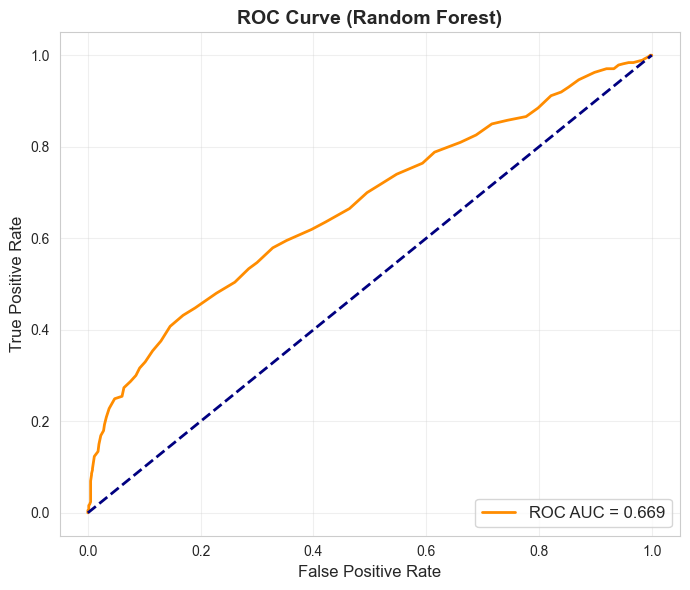

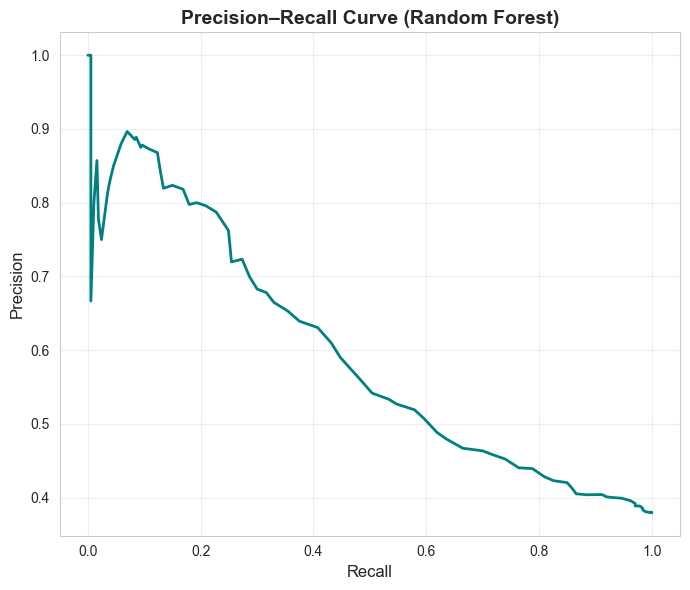

In [90]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

y_proba = rf.predict_proba(X_test)[:, 1]

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle="--")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve (Random Forest)", fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Precision-Recall Curve ---
prec, rec, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(7,6))
plt.plot(rec, prec, color='teal', lw=2)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision–Recall Curve (Random Forest)", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

The ROC curve shows that the model performs better than random guessing,  
while the Precision–Recall curve illustrates the balance between precision and recall.  
Together, these plots provide a clear view of how the classifier performs in practice.


## Conclusion :

- In this project, a machine learning pipeline was developed to predict drinking water potability using chemical features, applying both Random Forest and H2O AutoML. 
- The Random Forest model achieved an **ROC AUC of 0.669**, indicating performance above random guessing. 
- The **ROC curve** demonstrated that the model has reasonable discriminatory power, while the **Precision–Recall curve** highlighted a fair trade-off between precision and recall—particularly important due to class imbalance in the dataset. 
- These results provide a strong baseline for potable water prediction, but there is clear room for improvement. Potential next steps include hyperparameter optimization, applying imbalance-handling techniques (e.g., SMOTE, class weights, threshold tuning), and feature engineering based on domain knowledge. 
- Overall, this work establishes a practical foundation for water quality assessment, with the potential to become more reliable for real-world use in public health and environmental monitoring through further refinement.
